# <center> Cohort Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
online=pd.read_excel('Online Retail.xlsx')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#check nulls
np.sum(online.isna())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
##Remove cancelled transactions (quantity <0) and transactions that doesn't have CustomerID
online.dropna(subset=['CustomerID'],inplace=True)
online=online[~(online['Quantity']<0)]
np.sum(online.isna())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
##size df
online.shape

(397924, 8)

### Create two columns : InvoiceMonth - CohortMonth
***InvoiceMonth:*** represents a truncate date to first day of the month of the invoicedate column. <p>
***CohortMonth:*** represents the smallest invoice month value to each customer 

#### Assign acquisition month cohort

In [7]:
## function that truncates a given date object to first day of the month
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [37]:
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
##see new column created - sliced
online[['InvoiceDate','InvoiceMonth']][11500:11503]

,InvoiceDate,InvoiceMonth
17694,2010-12-08 12:36:00,2010-12-01
17695,2010-12-08 12:36:00,2010-12-01
17696,2010-12-08 12:36:00,2010-12-01


In [41]:
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online[['InvoiceDate','InvoiceMonth','CohortMonth']][11500:11503]

,InvoiceDate,InvoiceMonth,CohortMonth
17694,2010-12-08 12:36:00,2010-12-01,2010-12-01
17695,2010-12-08 12:36:00,2010-12-01,2010-12-01
17696,2010-12-08 12:36:00,2010-12-01,2010-12-01


In [10]:
online[111500:111503]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
164549,550651,22926,IVORY GIANT GARDEN THERMOMETER,2,2011-04-19 16:52:00,5.95,15436.0,United Kingdom,2011-04-01,2011-04-01
164550,550651,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-04-19 16:52:00,0.95,15436.0,United Kingdom,2011-04-01,2011-04-01
164551,550651,21933,PINK VINTAGE PAISLEY PICNIC BAG,3,2011-04-19 16:52:00,1.65,15436.0,United Kingdom,2011-04-01,2011-04-01


### Assign time offset value

In [11]:
##Function that extract year, month and day of a date
##of a dataframe col 
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [12]:
##Calculate the number of months between any transaction and the first transaction of the customer
##get years and months
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth') 
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

In [13]:
##calculate the diferences
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [14]:
# convert the total in months - (add +1 to interpret the first month as 1 instead of 0)
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


#### Dealing with Timestamp

In [40]:
##Truncate timestamp (just take date)
##see data type
online['CohortMonth'][0]

'01-12-2010'

In [42]:
#def truncate(timestamp): return dt.date(timestamp.year, timestamp.month, timestamp.day)
##Turn timestamp to object
def turn_object(timestamp): return timestamp.strftime("%Y-%m-%d")

In [43]:
##Change format of column CohortMonth
online['CohortMonth']=online['CohortMonth'].apply(turn_object)
online['CohortMonth'][0]

'2010-12-01'

### Count monthly active customers from each cohort

In [44]:
##group cohort columns created
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [45]:
#Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [46]:
##reset index (gives structure of a DF)
cohort_data = cohort_data.reset_index()
cohort_data.head(2)

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324


In [47]:
##pivoting data 
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex', 
                                  values='CustomerID')
cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN


## Calculate cohort metrics

In [48]:
#Store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

In [49]:
#Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

#### Retention Table

In [50]:
#Review the retention table
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ANOTHER METRICS

#### Average quantity for each cohort

In [78]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', 
                                     columns='CohortIndex', 
                                     values='Quantity')
average_quantity.round(2)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.94,15.57,15.59,15.76,13.51,14.82,15.96,15.50,18.15,17.57,18.87,13.39,15.25
2011-01-01,17.25,13.32,12.62,15.15,12.80,15.27,14.89,14.85,11.57,10.51,9.45,9.96,NaN
2011-02-01,11.11,13.54,19.02,11.98,12.28,12.26,13.54,13.33,10.85,12.32,13.39,NaN,NaN
2011-03-01,9.91,11.68,13.27,10.09,14.29,12.95,13.40,13.74,11.16,9.47,NaN,NaN,NaN
2011-04-01,9.99,10.39,9.77,11.85,11.80,8.59,9.90,9.48,7.45,NaN,NaN,NaN,NaN
2011-05-01,11.34,9.63,14.07,12.76,11.14,8.68,10.64,109.93,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.58,14.53,10.82,13.55,10.56,9.81,9.41,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.84,13.75,7.31,8.09,6.12,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.03,6.17,5.41,6.15,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Average price for each cohort

Analyze if there are any differences in shopping patterns across time and across cohorts.

In [52]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.1,3.1,3.0,3.2,2.9,3.8,3.0,2.8,3.0,2.8,3.2,2.8,2.7
2011-01-01,3.2,3.5,3.0,5.7,3.1,3.1,2.9,2.7,2.6,4.2,2.8,2.5,NaN
2011-02-01,3.3,3.8,3.8,3.1,2.9,2.8,2.8,3.2,2.9,2.9,3.2,NaN,NaN
2011-03-01,3.3,4.2,3.4,3.2,3.0,2.7,2.8,2.8,2.7,2.4,NaN,NaN,NaN
2011-04-01,3.4,3.7,3.3,2.7,2.9,2.9,2.9,2.8,2.6,NaN,NaN,NaN,NaN
2011-05-01,3.9,3.0,2.6,3.0,2.7,2.5,2.6,2.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,3.5,2.8,3.3,2.8,2.6,3.0,2.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.0,3.3,2.7,2.7,2.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.0,4.6,4.9,5.8,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizing cohort analysis

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Retention table

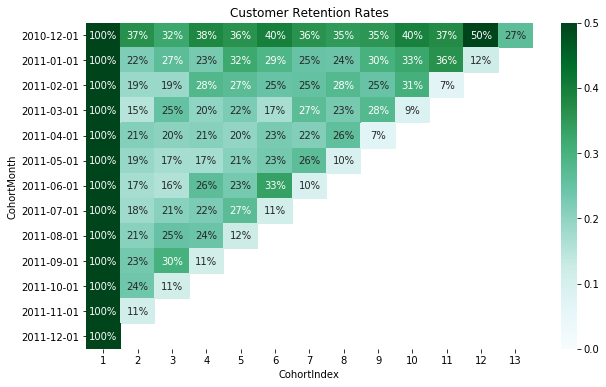

In [79]:
##custom figure size
plt.figure(figsize=(10, 6))

#title
plt.title('Customer Retention Rates')
sns.heatmap(data = retention, 
            annot = True, #numbers are printed
            fmt = '.0%', # define format as % with one decimal value
            vmin = 0.0, #anchor the colormap and make sure
            vmax = 0.5, # the outliers don't impact in the visualization
            cmap = 'BuGn') #color

#### Visualize average quantity metric

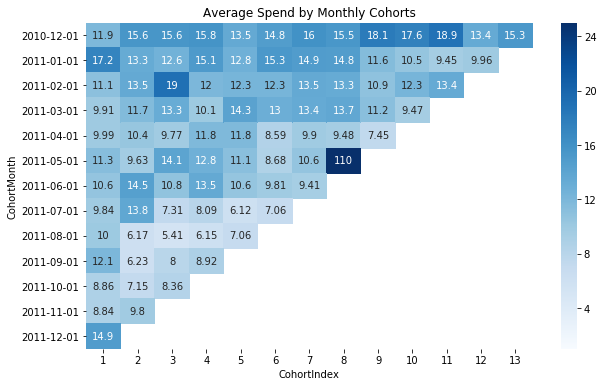

In [77]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(10,6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity,
            fmt = '.3g',
            vmin = 1, #anchor the colormap and make sure
            vmax = 25, # the outliers don't impact in the visualization
            annot=True, 
            cmap='Blues')
plt.show()

#### Visualize price for each cohort

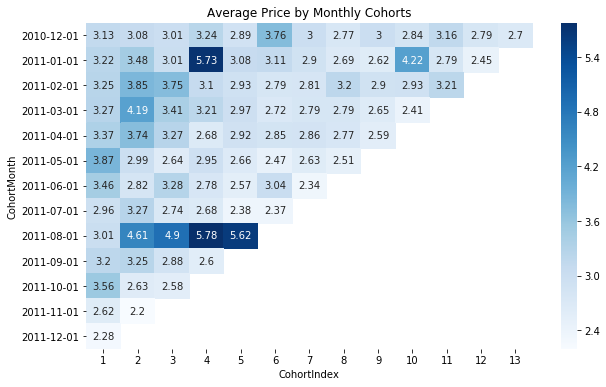

In [83]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(10,6))

# Add a title
plt.title('Average Price by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_price,
            fmt = '.3g',
            annot=True, 
            cmap='Blues')
plt.show()

## <center> Extra analysis -  Using total Price per item

In [84]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [85]:
##add new column
online['TotalPrice']=online['Quantity']*online['UnitPrice']

#### Average total price per item and ticket for each cohort

Analyze if there are any differences in shopping patterns across time and across cohorts.

In [88]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['TotalPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price_total = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='TotalPrice')
average_price_total.round(2).head(3)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,21.89,27.11,26.64,26.90,21.01,27.92,28.07,27.19,29.06,33.22,33.67,23.26,25.61
2011-01-01,26.56,24.84,20.82,30.94,22.36,26.08,25.10,25.24,18.99,22.11,19.36,19.30,NaN
2011-02-01,17.71,20.57,21.26,19.26,17.62,16.88,22.11,22.79,18.58,22.00,23.50,NaN,NaN


#### Visualize price for each cohort

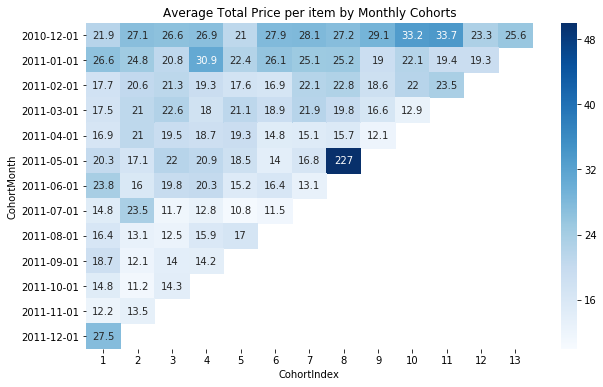

In [91]:
# Initialize an 10 by 6 inches plot figure
plt.figure(figsize=(10,6))

# Add a title
plt.title('Average Total Price per item by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_price_total,
            fmt = '.3g',
            vmin = 10, #anchor the colormap and make sure
            vmax = 50, # the outliers don't impact in the visualization
            annot=True, 
            cmap='Blues')
plt.show()

## <center> Extra analysis -  Using ticket total price

In [99]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [107]:
online[online['InvoiceNo']==537626]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalPrice
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-01,2010-12-01,1,25.20
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-01,2010-12-01,1,17.00
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-01,2010-12-01,1,39.00
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-01,2010-12-01,1,23.40
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-01,2010-12-01,1,15.00
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-01,2010-12-01,1,15.00
14944,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-01,2010-12-01,1,15.00
14945,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-01,2010-12-01,1,15.00
14946,537626,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-01,2010-12-01,1,15.00
14947,537626,22805,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-01,2010-12-01,1,15.00


In [121]:
##get total ticket price per customer
tickets=online.groupby(['CohortMonth','CohortIndex','CustomerID','InvoiceNo'])
cust_ticket=tickets['TotalPrice'].sum()\
            .reset_index()
cust_ticket.head(4)

,CohortMonth,CohortIndex,CustomerID,InvoiceNo,TotalPrice
0,2010-12-01,1,12347.0,537626,711.79
1,2010-12-01,1,12348.0,539318,892.80
2,2010-12-01,1,12370.0,538826,1590.82
3,2010-12-01,1,12370.0,539330,277.20


In [122]:
##get Average ticket price per customer
avg_ticket_cust=cust_ticket.groupby(['CohortMonth','CohortIndex','CustomerID'])\
            ['TotalPrice'].mean()\
            .reset_index()
avg_ticket_cust.head(3)

,CohortMonth,CohortIndex,CustomerID,TotalPrice
0,2010-12-01,1,12347.0,711.79
1,2010-12-01,1,12348.0,892.80
2,2010-12-01,1,12370.0,934.01


In [124]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = avg_ticket_cust.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['TotalPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price_per_ticket = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='TotalPrice')
average_price_per_ticket.round(2).head(3)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,374.79,519.41,473.22,475.33,389.97,447.52,439.31,502.10,487.32,536.81,589.5,506.79,521.14
2011-01-01,630.01,521.85,478.75,573.60,425.49,473.76,488.02,601.20,434.11,582.43,446.6,360.70,NaN
2011-02-01,380.06,343.76,413.71,336.89,327.82,301.42,471.36,450.03,463.98,410.28,348.0,NaN,NaN


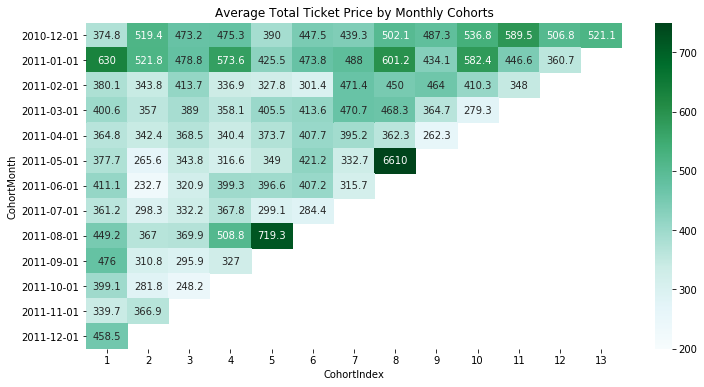

In [134]:
# Initialize an 10 by 6 inches plot figure
plt.figure(figsize=(12,6))

# Add a title
plt.title('Average Total Ticket Price by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_price_per_ticket,
            fmt = '.4g',
            vmin = 200, #anchor the colormap and make sure
            vmax = 750, # the outliers don't impact in the visualization
            annot=True, 
            cmap='BuGn')
plt.show()